In [1]:
import numpy as np
from math import sin, pi
import matplotlib.pyplot as plt

In [6]:
def RK(F, tau, T, y0):
    N = int(T/tau)+1
    t_mas = np.array([tau*n for n in range(0, N)])
    y = np.zeros((N, len(y0)), float)
    y[0] = y0
    k = 0
    while tau*(k+1) < T:
        k1 = F(t_mas[k], y[k])
        k11 = [tau*i/2 for i in k1]
        k2 = F(t_mas[k] + tau/2, y[k] + k11)
        k22 = [tau*i/2 for i in k2]
        k3 = F(t_mas[k] + tau/2, y[k] + k22)
        k33 = [tau*i for i in k3]
        k4 = F(t_mas[k] + tau, y[k] + k33)
        k2 = np.array([2*i for i in k2])
        k3 = np.array([2*i for i in k3])
        temp = np.array(k1 + k2 + k3 + k4)
        K = np.array([tau/6*i for i in temp])
        y[k+1] = y[k] + K
        k += 1
    return t_mas, y

def F(tn, yn):
    return np.array([yn[1], -sin(yn[0])])


[ 1.          0.9983393   0.99336074  0.98507504  0.97350017  0.95866164
  0.94059279  0.91933517  0.89493899  0.86746363  0.83697814  0.80356179
  0.76730459  0.72830778  0.68668426  0.64255892  0.59606888  0.54736357
  0.49660465  0.44396578  0.38963212  0.33379971  0.27667461  0.21847175
  0.15941377  0.0997295   0.03965241 -0.02058108 -0.08073338 -0.1405675
 -0.19984885 -0.25834695 -0.31583705 -0.37210162 -0.42693166 -0.48012787
 -0.53150154 -0.58087534 -0.62808374 -0.67297344 -0.71540343 -0.75524494
 -0.79238132 -0.82670768 -0.8581305  -0.88656717 -0.91194544 -0.93420295
 -0.95328664 -0.96915225 -0.9817639  -0.99109364 -0.99712113 -0.99983337
 -0.99922457 -0.99529602 -0.98805615 -0.97752061 -0.96371251 -0.94666266
 -0.92640997 -0.90300185 -0.87649472 -0.8469545  -0.81445719 -0.77908932
 -0.74094854 -0.700144   -0.65679678 -0.61104009 -0.56301948 -0.51289275
 -0.46082979 -0.40701219 -0.35163262 -0.29489408 -0.23700881 -0.17819717
 -0.11868618 -0.05870803  0.00150161  0.06170533  0.

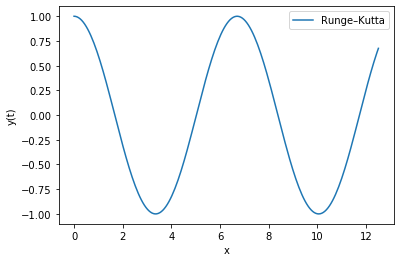

In [8]:
t, y = RK(F, pi/50, 4*pi, [1, 0])
u = np.array(y[:,0])
print(u)
plt.plot(t, u, label="Runge–Kutta")
plt.legend()
plt.ylabel("y(t)")
plt.xlabel("x")
plt.show()